In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import string

In [270]:
pd.read_csv('twitter_training[1].csv')

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [271]:
column_names = ['Tweet_ID','Entity','Sentiments','Tweet_contents']
df_train = pd.read_csv('twitter_training[1].csv',names= column_names)
df_validation = pd.read_csv('twitter_validation[1].csv',names= column_names)

In [272]:
df_train.head()

,Tweet_ID,Entity,Sentiments,Tweet_contents
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [273]:
df_validation.head()

,Tweet_ID,Entity,Sentiments,Tweet_contents
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [274]:
df_train.isnull().sum()

Tweet_ID            0
Entity              0
Sentiments          0
Tweet_contents    686
dtype: int64

In [275]:
df_validation.isnull().sum()

Tweet_ID          0
Entity            0
Sentiments        0
Tweet_contents    0
dtype: int64

In [276]:
df_train.shape

(74682, 4)

In [277]:
df_validation.shape

(1000, 4)

In [278]:
df_train.isnull().mean() * 100

Tweet_ID          0.000000
Entity            0.000000
Sentiments        0.000000
Tweet_contents    0.918561
dtype: float64

In [279]:
df_train[df_train.duplicated()]

,Tweet_ID,Entity,Sentiments,Tweet_contents
20,2404,Borderlands,Positive,that was the first borderlands session in a lo...
26,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
51,2409,Borderlands,Neutral,Blaming Sight for Tardiness! A little bit of b...
64,2411,Borderlands,Neutral,.. [
146,2425,Borderlands,Negative,"""What a bitch!"""
...,...,...,...,...
74505,9171,Nvidia,Neutral,This benchmarking comparison between Oculus Qu...
74510,9172,Nvidia,Positive,@ NVIDIAGeForce @ nvidia
74589,9185,Nvidia,Neutral,Heard people are having issues with ordering t...
74619,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...


In [280]:
df_train = df_train.drop_duplicates()

In [281]:
df_train.head()

,Tweet_ID,Entity,Sentiments,Tweet_contents
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [282]:
df_train = df_train.dropna()

In [283]:
df_train.head()

,Tweet_ID,Entity,Sentiments,Tweet_contents
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [284]:
df_train.shape

(71656, 4)

In [285]:
filtered_df = df_train[df_train['Tweet_contents'].str.contains('https', case=False, na=False)]['Tweet_contents']

In [286]:
print(filtered_df)

288      Modern Warfare For $38, Borderlands 3 For $20,...
289      Modern Warfare for $38, Borderlands 3 for $20 ...
291      Modern Warfare Not $38, Borderlands For For $2...
292      Modern Warfare 11 For $ 38, Borderlands 3 For ...
384      Pretty Happy with this! I made these sub badge...
                               ...                        
74646    NVIDIA released a security update for its driv...
74647    NVIDIA has released a security update for its ...
74649    NVIDIA released another software update for it...
74650    NVIDIA released a new security update for its ...
74651    NVIDIA released its substantial update for its...
Name: Tweet_contents, Length: 2322, dtype: object


In [287]:
df_train[df_train['Tweet_contents'].str.contains('Modern', case=False, na=False)]['Tweet_contents']

288      Modern Warfare For $38, Borderlands 3 For $20,...
289      Modern Warfare for $38, Borderlands 3 for $20 ...
290      Modern Warfare for $38, Borderlands 3 for $20,...
291      Modern Warfare Not $38, Borderlands For For $2...
292      Modern Warfare 11 For $ 38, Borderlands 3 For ...
                               ...                        
74197    @ nvidia why? But why? We buy 2 tickets convin...
74198    @ nvidia why? But why? We buy 2 postcards, con...
74199    @nvidia🤔 why? But why?  We buy 2 teams convinc...
74200    [UNK] why? But why why? We buy 2 cards convinc...
74201    @nvidia<unk><unk>? But why? You buy 5 cards co...
Name: Tweet_contents, Length: 264, dtype: object

In [288]:
# import re

# def find_emojis(text):
#     pattern = r'[\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F900-\U0001F9FF]'
#     emojis = re.findall(pattern, text)
#     return emojis

# # Example usage
# given_text = " @nvidia🤔 why? But why?  We buy 2 teams"
# found_emojis = find_emojis(given_text)
# print(found_emojis)

In [289]:
pip install demoji

Note: you may need to restart the kernel to use updated packages.


In [290]:
def remove_urls(text):
    pattern = r"http[s]?://\S+"
    without_urls = re.sub(pattern, "", text)
    return without_urls

import demoji

def remove_emojis(text):
    cleaned_text = demoji.replace(text, '')
    return cleaned_text




In [291]:
df_train['Tweet_contents'] = df_train['Tweet_contents'].apply(lambda x: remove_emojis(x))
df_train['Tweet_contents'] = df_train['Tweet_contents'].apply(lambda x: remove_urls(x))

In [292]:
df_validation['Tweet_contents'] = df_validation['Tweet_contents'].apply(lambda x: remove_emojis(x))
df_validation['Tweet_contents'] = df_validation['Tweet_contents'].apply(lambda x: remove_urls(x))

In [293]:
df_train['Sentiments'].value_counts()

Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: Sentiments, dtype: int64

C:\Users\Muskan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiments', ylabel='count'>

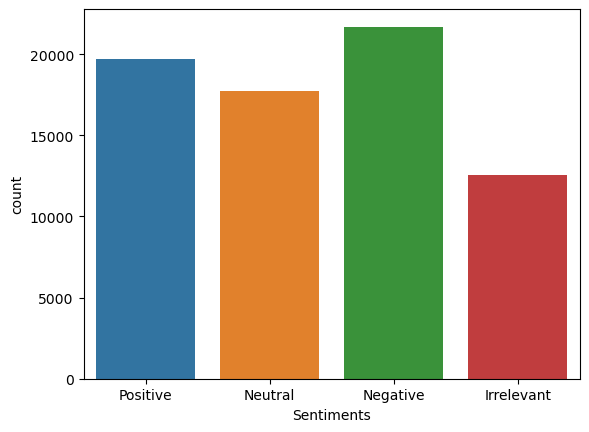

In [294]:
sns.countplot(df_train['Sentiments'])

C:\Users\Muskan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiments', ylabel='count'>

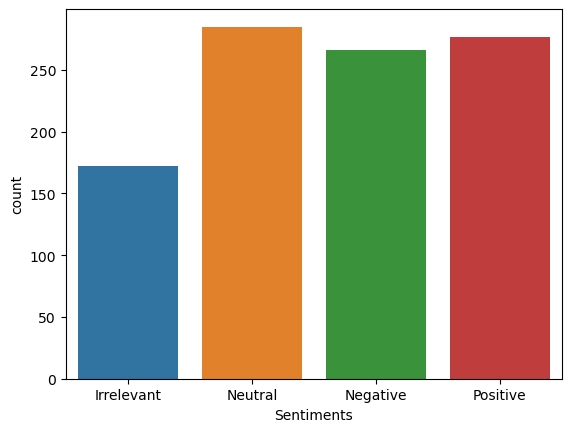

In [295]:
sns.countplot(df_validation['Sentiments'])

In [296]:
df_train['Entity'].value_counts()

TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2206
Xbox(Xseries)                        2201
Google                            

In [297]:
df_train['text_len'] = df_train['Tweet_contents'].apply(len)
df_validation['text_len'] = df_validation['Tweet_contents'].apply(len)

In [298]:
df_train['Tweet_contents'].apply(lambda x: len(x))

0         53
1         51
2         50
3         51
4         57
        ... 
74677    128
74678    117
74679    125
74680    159
74681    119
Name: Tweet_contents, Length: 71656, dtype: int64

<AxesSubplot:xlabel='text_len', ylabel='Density'>

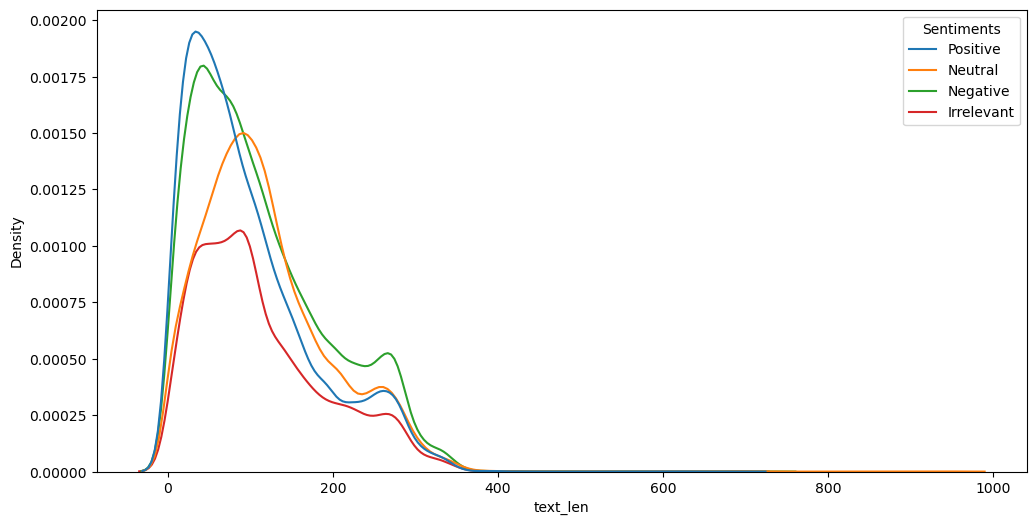

In [299]:
plt.figure(figsize=(12,6))
sns.kdeplot(df_train['text_len'],hue=df_train['Sentiments'])

<AxesSubplot:xlabel='text_len', ylabel='Density'>

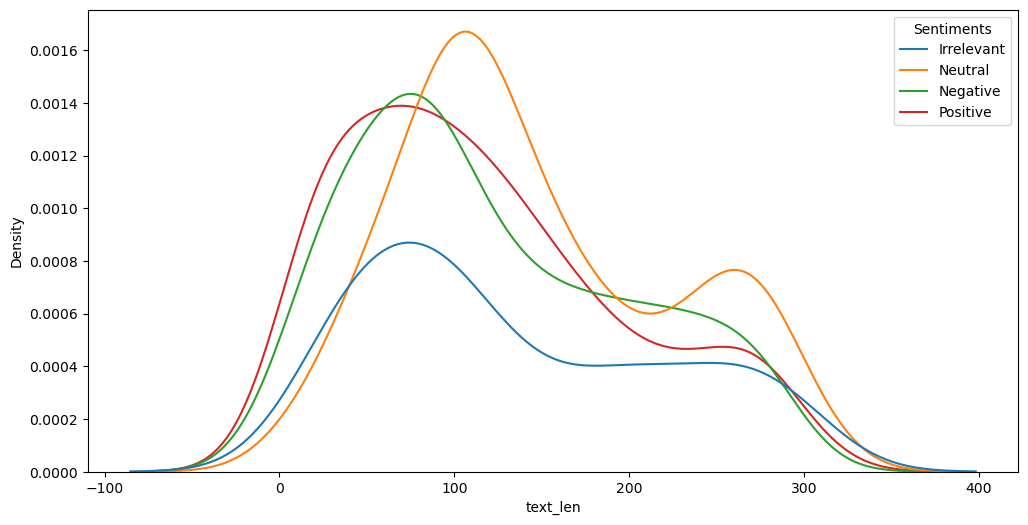

In [300]:
plt.figure(figsize=(12,6))
sns.kdeplot(df_validation['text_len'],hue=df_validation['Sentiments'])

In [301]:
df_train['Entity'].value_counts()

TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2206
Xbox(Xseries)                        2201
Google                            

In [302]:
df_train[df_train['Sentiments']=='Positive'].max()

Tweet_ID                                                      13198
Entity                                              johnson&johnson
Sentiments                                                 Positive
Tweet_contents    − So since The Valorant and Call of Duty Cold ...
text_len                                                        692
dtype: object

In [303]:
df_train[df_train['Sentiments']=='Negative'].max()

Tweet_ID                                                13194
Entity                                        johnson&johnson
Sentiments                                           Negative
Tweet_contents    − Yep, I'm totally trolling. / The rolleyes
text_len                                                  727
dtype: object

In [304]:
df_train[df_train['Sentiments']=='Neutral'].max()

Tweet_ID                                                      13197
Entity                                              johnson&johnson
Sentiments                                                  Neutral
Tweet_contents    → @eLjeeeey Thanks for our entering to Grand S...
text_len                                                        957
dtype: object

In [305]:
df_train[df_train['Sentiments']=='Irrelevant'].max()

Tweet_ID                                                      13200
Entity                                              johnson&johnson
Sentiments                                               Irrelevant
Tweet_contents    − A long ban for Battlefield Commander 4 but p...
text_len                                                        692
dtype: object

In [306]:
df_train[df_train['text_len']==692]

,Tweet_ID,Entity,Sentiments,Tweet_contents,text_len
3098,1737,CallOfDutyBlackopsColdWar,Negative,"Italy, Italy, Italy, Italy, Italy, Italy, Ital...",692
3968,1885,CallOfDutyBlackopsColdWar,Irrelevant,"Italy, Italy, Italy, Italy, Italy, Italy, Ital...",692
10256,12966,Xbox(Xseries),Neutral,"Italy, Italy, Italy, Italy, Italy, Italy, Ital...",692
18128,9907,PlayStation5(PS5),Positive,"Italy, Italy, Italy, Italy, Italy, Italy, Ital...",692
36308,8231,Microsoft,Irrelevant,"Italy, Italy, Italy, Italy, Italy, Italy, Ital...",692
59126,3335,Facebook,Irrelevant,"Italy, Italy, Italy, Italy, Italy, Italy, Ital...",692
73244,8947,Nvidia,Neutral,"Italy, Italy, Italy, Italy, Italy, Italy, Ital...",692


In [307]:
df_train[df_train['text_len']==727]

,Tweet_ID,Entity,Sentiments,Tweet_contents,text_len
28994,588,ApexLegends,Negative,"At the same time, there are many low-income co...",727


In [308]:
data = df_train.groupby(by=['Entity','Sentiments']).count().reset_index()

In [309]:
data.head()

,Entity,Sentiments,Tweet_ID,Tweet_contents,text_len
0,Amazon,Irrelevant,185,185,185
1,Amazon,Negative,565,565,565
2,Amazon,Neutral,1197,1197,1197
3,Amazon,Positive,302,302,302
4,ApexLegends,Irrelevant,185,185,185


Text(0, 0.5, 'No. of Tweets')

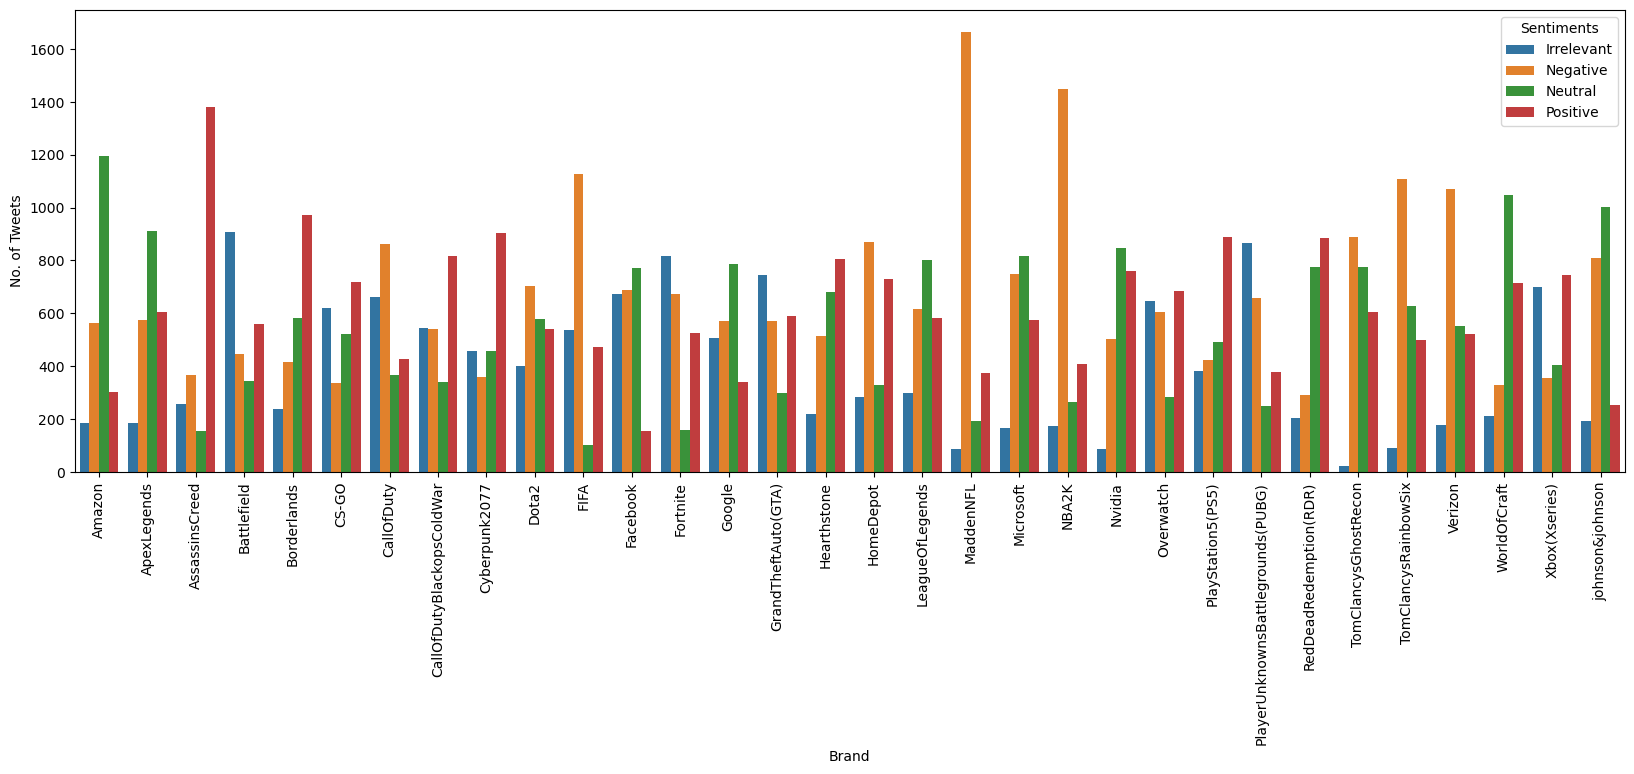

In [310]:
plt.figure(figsize=(20,6))
sns.barplot(x ='Entity', y='Tweet_ID', data= data, hue = 'Sentiments')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('No. of Tweets')

In [311]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# def generate_word_cloud(text):
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis('off')
#     plt.show()

# text = "Hello world! This is a sample text for generating a word cloud."

# generate_word_cloud(text)



In [312]:
from wordcloud import WordCloud

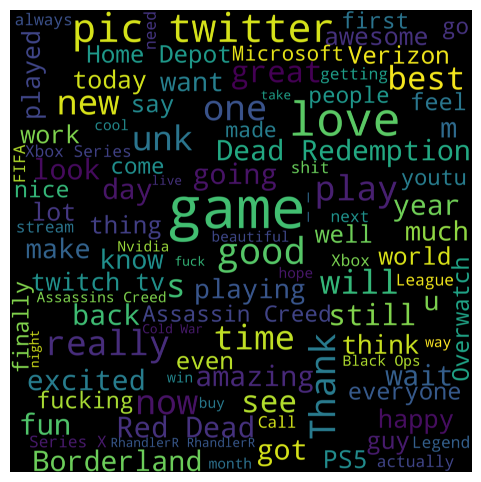

In [313]:
word_cloud_text = ''.join(df_train[df_train["Sentiments"]=="Positive"]['Tweet_contents'])
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

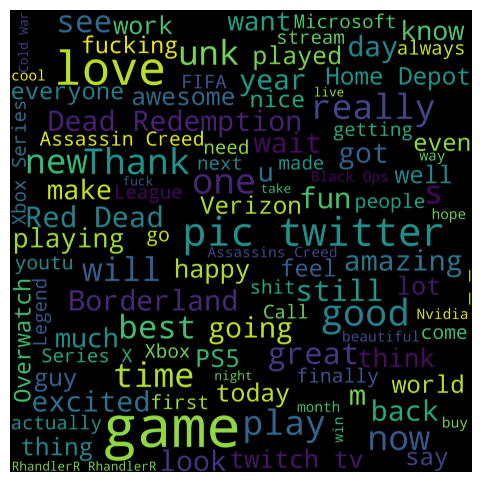

In [314]:
world_cloud_text = ''.join(df_train[df_train['Sentiments'] == 'Negative']['Tweet_contents'])
wordcloud = WordCloud(max_words=100, max_font_size=100,width=800,height=800,background_color='black',
                      scale=10).generate(word_cloud_text)
plt.figure(figsize=(6,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

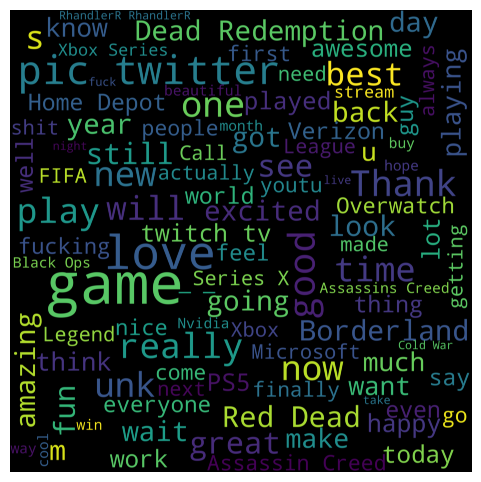

In [315]:
world_cloud_text = ''.join(df_train[df_train['Sentiments']=='Neutral']['Tweet_contents'])
wordcloud = WordCloud(max_words=100, max_font_size=100,width=800,height=800,background_color='black',
                      scale=10).generate(word_cloud_text)
plt.figure(figsize=(6,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

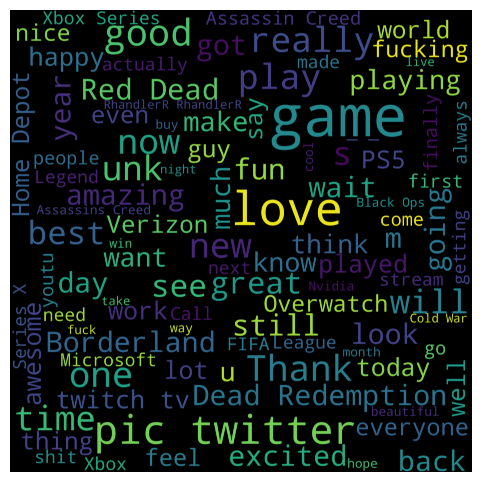

In [316]:
world_cloud_text = ''.join(df_train[df_train['Sentiments']=='Irrelevant']['Tweet_contents'])
wordcloud = WordCloud(max_words=100, max_font_size=100,width=800,height=800,background_color='black',
                      scale=10).generate(word_cloud_text)
plt.figure(figsize=(6,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:ylabel='text_len'>

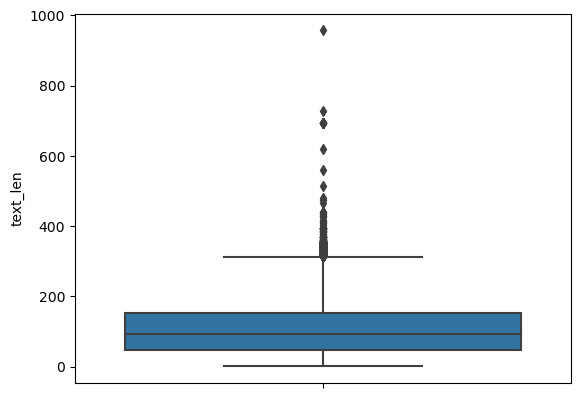

In [317]:
sns.boxplot(y= df_train['text_len'])

<AxesSubplot:ylabel='text_len'>

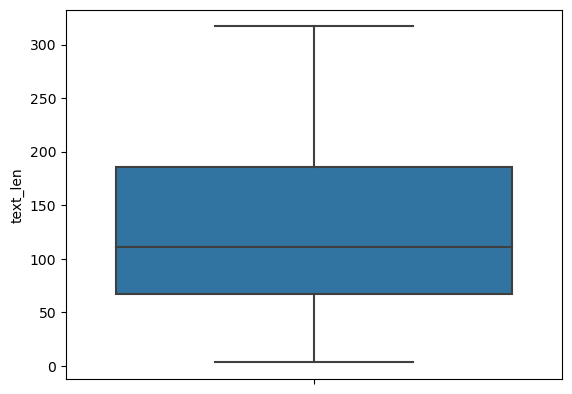

In [318]:
sns.boxplot(y=df_validation['text_len'])

In [319]:
df_train['text_len'].describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99])

count    71656.000000
mean       109.985082
std         78.935069
min          1.000000
1%           2.000000
5%          13.000000
25%         48.000000
50%         92.000000
75%        154.000000
95%        270.000000
99%        316.000000
max        957.000000
Name: text_len, dtype: float64

In [320]:
q3 = df_train['text_len'].quantile(0.75)
q1 = df_train['text_len'].quantile(0.25)
iqr = q3 - q1
low_fence = q1-1.5*iqr
upper_fence = q3+1.5*iqr

df_train = df_train[(df_train['text_len']>=low_fence) & (df_train['text_len']<=upper_fence)]


<AxesSubplot:ylabel='text_len'>

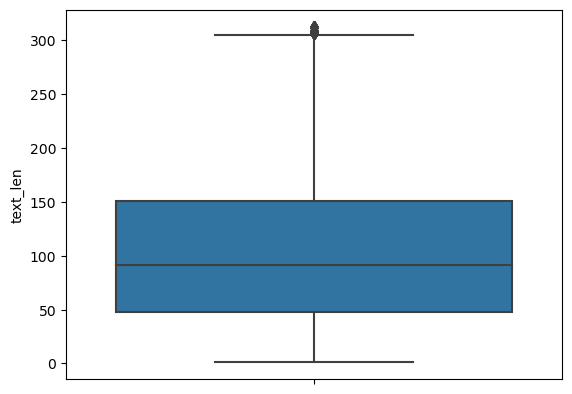

In [321]:
sns.boxplot(y= df_train['text_len'])

In [322]:
df_train['Sentiments'] = df_train['Sentiments'].map({"Positive":0,"Negative":1,"Neutral":2,"Irrelevant":3})

In [323]:
df_train['Sentiments'].value_counts()

1    21437
0    19539
2    17508
3    12387
Name: Sentiments, dtype: int64

In [324]:
df_validation['Sentiments'] = df_validation['Sentiments'].map({"Positive":0,"Negative":1,"Neutral":2,"Irrelevant":3})

In [325]:
df_validation['Sentiments'].value_counts()

2    285
0    277
1    266
3    172
Name: Sentiments, dtype: int64

In [326]:
import nltk

In [327]:
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

In [328]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [329]:
df_train

,Tweet_ID,Entity,Sentiments,Tweet_contents,text_len
0,2401,Borderlands,0,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,0,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,0,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,0,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,0,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,0,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,0,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,0,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,0,Just realized between the windows partition of...,159


In [330]:
stop_words = stopwords.words('english')
tweet = TweetTokenizer()

def clean_tweet_content(tweet_content):
    # Remove special characters and convert to lowercase
    tweet_content = re.sub(r'[^\w\s]', '', tweet_content).lower()

    # Replace specific word with its expanded form
    tweet_content = re.sub(r'\bim\b', 'i am', tweet_content)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tweet_content = ' '.join(word for word in tweet_content.split() if word not in stop_words)
    
    tokens = tweet.tokenize(tweet_content)
    tweet_content = [word for word in tokens if word not in stop_words]
    tweet_content = " ".join(tweet_content)
    
    return tweet_content

In [331]:
df_train['Tweet_contents'] = df_train['Tweet_contents'].transform(clean_tweet_content)

In [332]:
df_validation['Tweet_contents'] = df_validation['Tweet_contents'].transform(clean_tweet_content)

In [333]:
X = df_train['Tweet_contents']

In [334]:
y= df_train['Sentiments']

In [335]:
from sklearn.model_selection import train_test_split

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [337]:
from sklearn.pipeline import Pipeline

In [338]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [339]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier',ExtraTreesClassifier())
])

In [340]:
from sklearn import set_config

In [341]:
set_config(display='diagram')

In [342]:
pipeline

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', ExtraTreesClassifier())])

In [343]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', ExtraTreesClassifier())])

In [344]:
pred_extra = pipeline.predict(X_test)


In [345]:
print(confusion_matrix(y_test, pred_extra))
print(classification_report(y_test, pred_extra))

[[5562  143  111   52]
 [ 279 6092  105   33]
 [ 347  135 4669   35]
 [ 314  116  130 3139]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5868
           1       0.94      0.94      0.94      6509
           2       0.93      0.90      0.92      5186
           3       0.96      0.85      0.90      3699

    accuracy                           0.92     21262
   macro avg       0.92      0.91      0.91     21262
weighted avg       0.92      0.92      0.92     21262



In [346]:
# validation data

In [347]:
X_valid = df_validation['Tweet_contents']

# X_valid = pipeline.named_steps['vectorizer'].transform(df_validation['Tweet_contents'])
y_valid = df_validation['Sentiments']

In [348]:
y_pred_valid = pipeline.predict(X_valid)

In [349]:
print(confusion_matrix(y_valid,y_pred_valid))
print(classification_report(y_valid,y_pred_valid))

[[273   1   3   0]
 [  1 262   3   0]
 [  8   1 275   1]
 [  3   4   1 164]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       277
           1       0.98      0.98      0.98       266
           2       0.98      0.96      0.97       285
           3       0.99      0.95      0.97       172

    accuracy                           0.97      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [350]:
pipeline.predict(['fuck'])

array([1], dtype=int64)

In [351]:
pipeline.predict(['okay'])

array([0], dtype=int64)

In [352]:
pipeline.predict(['all i want is good food'])

array([0], dtype=int64)

In [188]:
# save the model


In [353]:
from joblib import dump


In [354]:
dump(pipeline, 'sentiment_model_pipeline.joblib')


['sentiment_model_pipeline.joblib']

In [355]:
from joblib import load

In [356]:
loaded_model = load('sentiment_model_pipeline.joblib')

In [357]:
text = "Your support team is useless"

In [358]:
pipeline.predict([text])

array([0], dtype=int64)

In [359]:
text1 = 'Rock-Hard La Varlope, RARE & POWERFUL, HANDSOME JACKPOT, Borderlands 3 (Xbox) dlvr.it/RMTrgF '

In [360]:
pipeline.predict([text1])

array([2], dtype=int64)